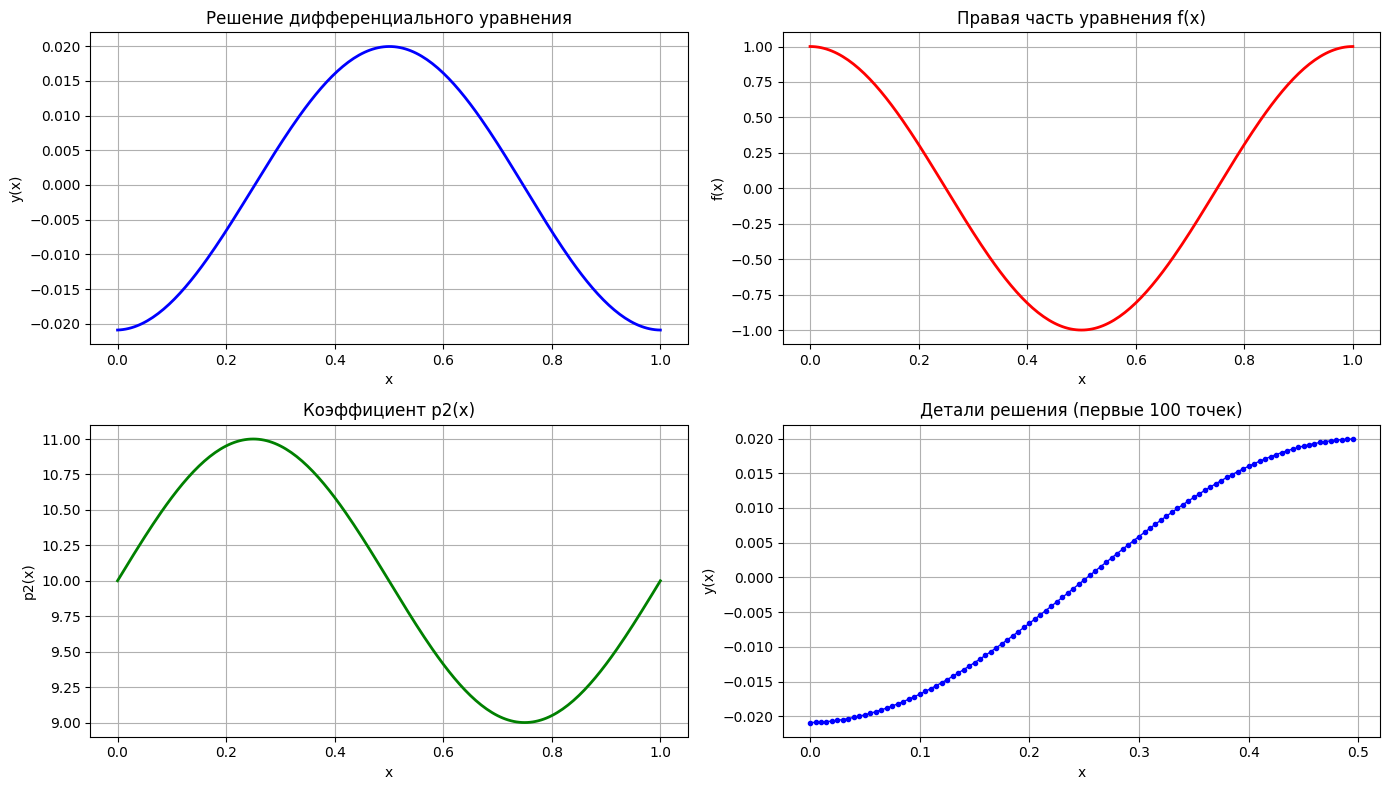

Первые 10 значений решения:
x = 0.00000, y = -0.0208917446
x = 0.00500, y = -0.0208679526
x = 0.01000, y = -0.0208244064
x = 0.01500, y = -0.0207611482
x = 0.02000, y = -0.0206782402
x = 0.02500, y = -0.0205757636
x = 0.03000, y = -0.0204538193
x = 0.03500, y = -0.0203125270
x = 0.04000, y = -0.0201520257
x = 0.04500, y = -0.0199724732


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
H = 0.005
N = int(1.0 / H) + 1 

# Функции коэффициентов
def p2(x):
    return 10.0 + np.sin(2.0 * np.pi * x)

def f(x):
    return np.cos(2.0 * np.pi * x)

# Реализация метода прогонки для периодических условий
def solve_periodic():
    # Сетка
    x = np.array([i * H for i in range(N)])
    
    # Коэффициенты трёхдиагональной матрицы
    a = np.full(N, 1.0)  # Поддиагональ
    b = np.array([2.0 + H**2 * p2(xi) for xi in x])  # Главная диагональ
    c = np.full(N, 1.0)  # Наддиагональ
    d = np.array([H**2 * f(xi) for xi in x])  # Правая часть
    
    # Прямой ход: вычисляем alpha, beta, gamma
    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)
    
    alpha[1] = c[0] / b[0]
    beta[1] = -d[0] / b[0]
    gamma[1] = a[0] / b[0]
    
    for n in range(1, N-1):
        den = b[n] - a[n] * alpha[n]
        alpha[n+1] = c[n] / den
        beta[n+1] = (-d[n] + a[n] * beta[n]) / den
        gamma[n+1] = (a[n] * gamma[n]) / den
    
    # Условие на последнем узле с учётом периодичности
    den_N = -b[N-1] + a[N-1] * (alpha[N-1] + gamma[N-1])
    mu_N = -c[N-1] / den_N
    nu_N = (d[N-1] - a[N-1] * beta[N-1]) / den_N
    
    # Обратный ход: вычисляем mu, nu
    mu = np.zeros(N)
    nu = np.zeros(N)
    mu[N-1] = mu_N
    nu[N-1] = nu_N
    
    for n in range(N-1, 0, -1):
        mu[n-1] = alpha[n] * mu[n] + gamma[n] * mu_N
        nu[n-1] = beta[n] + alpha[n] * nu[n] + gamma[n] * nu_N
    
    # Вычисляем y[0] (с учётом y[0] = y[N-1])
    y0 = nu[0] / (1.0 - mu[0])
    
    # Вычисляем решение y
    y = np.zeros(N)
    y[0] = y0
    y[N-1] = mu[N-1] * y[0] + nu[N-1]
    
    for n in range(N-1, 0, -1):
        y[n-1] = alpha[n] * y[n] + beta[n] + gamma[n] * y[N-1]
    
    return x, y

# Получаем решение
x_values, solution = solve_periodic()

# Визуализация
plt.figure(figsize=(14, 8))

# График решения
plt.subplot(2, 2, 1)
plt.plot(x_values, solution, 'b-', linewidth=2)
plt.title('Решение дифференциального уравнения')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

# График правой части f(x)
plt.subplot(2, 2, 2)
plt.plot(x_values, f(x_values), 'r-', linewidth=2)
plt.title('Правая часть уравнения f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# График коэффициента p2(x)
plt.subplot(2, 2, 3)
plt.plot(x_values, p2(x_values), 'g-', linewidth=2)
plt.title('Коэффициент p2(x)')
plt.xlabel('x')
plt.ylabel('p2(x)')
plt.grid(True)

# Детали решения (первые 100 точек)
plt.subplot(2, 2, 4)
plt.plot(x_values[:100], solution[:100], 'b-o', markersize=3, linewidth=1)
plt.title('Детали решения (первые 100 точек)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Сохранение данных
np.savetxt('solution_data.txt', 
           np.column_stack((x_values, solution)), 
           fmt='%.5f %.10f', 
           header='x y')

# Вывод первых 10 значений
print("Первые 10 значений решения:")
for i in range(10):
    print(f"x = {x_values[i]:.5f}, y = {solution[i]:.10f}")